In [17]:
import pandas as pd # Use the work with the dataframes
import numpy as np  # Mainly use to assing nan values as np.nan
import matplotlib.pyplot as plt # Visualitzation
from matplotlib.ticker import MaxNLocator # Visualitzation
import statistics  # Uses to compute statistics
import os
import scipy.interpolate
from collections import Counter
import matplotlib.dates as mdates
from main import *

In [18]:
#BHP_2007 = pd.read_csv(r'C:\Users\rprocious\PSM Lighthouse\CBI\2007-08 NWLON Station 6min Corrections\2007-08 NWLON Station 6min Corrections\bob-hall-2007-output.csv')
BHP_2007 = pd.read_csv('/Users/rprocious/Waterlevels_CBI/CBI-2/2007-08 NWLON Station 6min Corrections/2007-08 NWLON Station 6min Corrections/bob-hall-2007-output.csv')
#BHP_2008 = pd.read_csv(r'C:\Users\rprocious\PSM Lighthouse\CBI\2007-08 NWLON Station 6min Corrections\2007-08 NWLON Station 6min Corrections\bob-hall-2008-output.csv')
BHP_2008 = pd.read_csv('/Users/rprocious/Waterlevels_CBI/CBI-2/2007-08 NWLON Station 6min Corrections/2007-08 NWLON Station 6min Corrections/bob-hall-2008-output.csv')
BHP_2007.drop(labels=range(0,40),axis=0, inplace=True)
BHP_2007.reset_index(drop = True, inplace=True)
BHP_2008.drop(labels=range(0,2),axis=0, inplace=True)
BHP_2008.reset_index(drop = True, inplace=True)
BHP_2007.replace([-999, -99, 99, 'NA', 'RM'], np.nan, inplace=True)
BHP_2007['Dates'] = pd.to_datetime(BHP_2007['Date'])
BHP_2007['Water Level'] = pd.to_numeric(BHP_2007['Water Level'], errors='coerce')
BHP_2008.replace([-999, -99, 99, 'NA', 'RM'], np.nan, inplace=True)
BHP_2008['Dates'] = pd.to_datetime(BHP_2008['Date'])
BHP_2008['Water Level'] = pd.to_numeric(BHP_2008['Water Level'], errors='coerce')
BHP = pd.concat([BHP_2007,BHP_2008],ignore_index=True)

In [19]:
bhp_light9300 = pd.read_csv(r'/Users/rprocious/Downloads/data/lighthouse/Bob Hall Pier/BobHallPier_1993-2000_pwl_harmwl_bwl.csv')
#bhp_light9300 = pd.read_csv(r'C:\Users\mrpro\OneDrive\Desktop\Data_Analysis_Project\data\lighthouse\Bob Hall Pier\BobHallPier_1993-2000_pwl_harmwl_bwl.csv')
bhp_light9300.drop(labels=range(701280,701286),axis = 0, inplace = True)

bhp_light0112 = pd.read_csv(r'/Users/rprocious/Downloads/data/lighthouse/Bob Hall Pier/BobHallPier_2001-2012_pwl_harmwl_bwl.csv')
#bhp_light0112 = pd.read_csv(r'C:\Users\mrpro\OneDrive\Desktop\Data_Analysis_Project\data\lighthouse\Bob Hall Pier\BobHallPier_2001-2012_pwl_harmwl_bwl.csv')
bhp_light0112.drop(labels=range(1051920,1051926), axis = 0, inplace=True)


bhp_light1323 = pd.read_csv(r'/Users/rprocious/Downloads/data/lighthouse/Bob Hall Pier/BobHallPier_2013-2023_pwl_harmwl_bwl.csv')
#bhp_light1323 = pd.read_csv(r'C:\Users\mrpro\OneDrive\Desktop\Data_Analysis_Project\data\lighthouse\Bob Hall Pier\BobHallPier_2013-2023_pwl_harmwl_bwl.csv')
bhp_light1323.drop(labels=range(len(bhp_light1323)-6,len(bhp_light1323)), axis=0, inplace=True)
frames = [bhp_light9300,bhp_light0112,bhp_light1323]
bhp_light = pd.concat(frames, ignore_index=True)
len(bhp_light)
directory_path = '/Users/rprocious/Downloads/data/NOAA/bobHallPier/'
#directory_path = r'C:\Users\mrpro\OneDrive\Desktop\Data_Analysis_Project\data\NOAA\bobHallPier'
dataframes = []

# Loop through the files in the directory
for filename in sorted(os.listdir(directory_path)):
    if filename.endswith('level.csv'):

        file_path = os.path.join(directory_path, filename)
        
        
        df = pd.read_csv(file_path)
        
        dataframes.append(df)

bhp_NOAA = pd.concat(dataframes, ignore_index=True)
bhp_NOAA.drop(labels=range(0,3), axis=0, inplace=True)
bhp_NOAA.drop(labels=range(2304169,2304171), axis=0, inplace=True)
bhp_light.replace([-999, -99, 99, 'NA', 'RM'], np.nan, inplace=True)
bhp_light['#date+time'] = pd.to_datetime(bhp_light['#date+time'])
bhp_light['014-pwl'] = pd.to_numeric(bhp_light['014-pwl'], errors='coerce')



#converting NOAA dataset to date time and numeric values
bhp_NOAA.replace([-999, -99, 99, 'NA', 'RM'], np.nan, inplace=True)
bhp_NOAA['Date Time'] = pd.to_datetime(bhp_NOAA['Date Time'])
bhp_NOAA[' Water Level'] = pd.to_numeric(bhp_NOAA[' Water Level'], errors = 'coerce')

#remove all light house data till 1996 because thats when NOAA data begins
bhp_light.drop(labels=range(0,262800),axis=0, inplace=True)

bhp_light.reset_index(drop = True, inplace=True)
comparison_df = pd.DataFrame()
comparison_df['Dates'] = bhp_light['#date+time']
comparison_df['Lighthouse WL'] = bhp_light['014-pwl']
comparison_df['NOAA WL'] = bhp_NOAA[' Water Level']
comparison_df['Shifted NOAA'] = comparison_df['NOAA WL'].shift(-3)

/var/folders/y3/cr8y1g617l16hvdtqnqzmgz80000gn/T/ipykernel_450/3909285561.py:5: DtypeWarning: Columns (1,2) have mixed types. Specify dtype option on import or set low_memory=False.
  bhp_light0112 = pd.read_csv(r'/Users/rprocious/Downloads/data/lighthouse/Bob Hall Pier/BobHallPier_2001-2012_pwl_harmwl_bwl.csv')
/var/folders/y3/cr8y1g617l16hvdtqnqzmgz80000gn/T/ipykernel_450/3909285561.py:10: DtypeWarning: Columns (1,2) have mixed types. Specify dtype option on import or set low_memory=False.
  bhp_light1323 = pd.read_csv(r'/Users/rprocious/Downloads/data/lighthouse/Bob Hall Pier/BobHallPier_2013-2023_pwl_harmwl_bwl.csv')


Locator attempting to generate 1056 ticks ([9024.0, ..., 19574.0]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1056 ticks ([9024.0, ..., 19574.0]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1056 ticks ([9024.0, ..., 19574.0]), which exceeds Locator.MAXTICKS (1000).


Text(0.5, 1.0, 'Lighthouse and NOAA Offset')

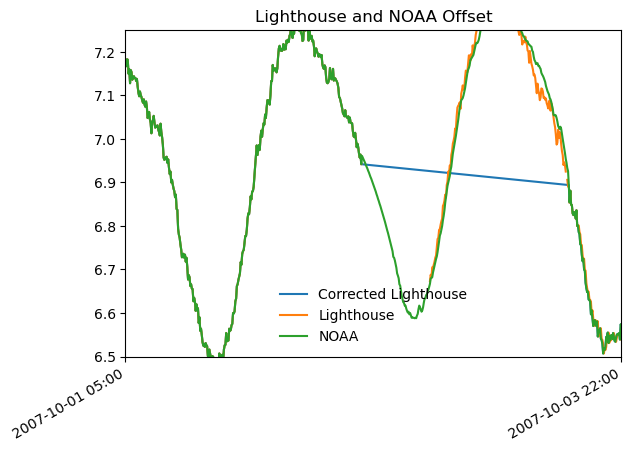

In [20]:
plt.plot(BHP['Dates'],BHP['Water Level'],label = 'Corrected Lighthouse')

plt.plot(comparison_df['Dates'],comparison_df['Lighthouse WL'],label = 'Lighthouse')

plt.plot(comparison_df['Dates'],comparison_df['Shifted NOAA'],label = 'NOAA')

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d %H:%M'))

plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=10))

plt.gcf().autofmt_xdate()

plt.ylim(6.5,7.25)

start_date = pd.to_datetime('2007-10-01 05:00')

end_date = pd.to_datetime('2007-10-03 22:00')

plt.xlim(start_date, end_date)
plt.legend(frameon = False)
plt.title('Lighthouse and NOAA Offset')

In [21]:
comparison_df

,Dates,Lighthouse WL,NOAA WL,Shifted NOAA
0,1996-01-01 00:00:00,6.800,NaN,6.800
1,1996-01-01 00:06:00,6.773,NaN,6.773
2,1996-01-01 00:12:00,6.806,NaN,6.806
3,1996-01-01 00:18:00,6.833,6.800,6.833
4,1996-01-01 00:24:00,6.869,6.773,6.869
...,...,...,...,...
2454469,2023-12-31 22:54:00,NaN,NaN,NaN
2454470,2023-12-31 23:00:00,NaN,NaN,NaN
2454471,2023-12-31 23:06:00,NaN,NaN,NaN
2454472,2023-12-31 23:12:00,NaN,NaN,NaN


In [22]:
total_df = BHP.merge(comparison_df,on='Dates')


In [23]:
total_df = total_df.drop(columns='Station #',axis=0)
total_df = total_df.drop(columns='NOAA WL',axis=0)
total_df = total_df.drop(columns='Date',axis=0)
total_df['NES WL'] = total_df["Water Level"]
total_df

,Water Level,Dates,Lighthouse WL,Shifted NOAA,NES WL
0,6.861,2007-01-01 00:00:00,6.861,6.861,6.861
1,6.851,2007-01-01 00:06:00,6.851,6.851,6.851
2,6.848,2007-01-01 00:12:00,6.848,6.848,6.848
3,6.855,2007-01-01 00:18:00,6.855,6.855,6.855
4,6.865,2007-01-01 00:24:00,6.865,6.865,6.865
...,...,...,...,...,...
172246,6.774,2008-12-31 23:18:00,6.756,6.774,6.774
172247,6.771,2008-12-31 23:24:00,6.774,6.771,6.771
172248,6.795,2008-12-31 23:30:00,6.771,6.795,6.795
172249,6.796,2008-12-31 23:36:00,6.795,6.796,6.796


In [24]:
total_df[64820:64860]

,Water Level,Dates,Lighthouse WL,Shifted NOAA,NES WL
64820,7.004,2007-10-02 11:00:00,7.004,7.004,7.004
64821,7.014,2007-10-02 11:06:00,7.014,7.014,7.014
64822,7.000,2007-10-02 11:12:00,7.000,7.000,7.000
64823,6.981,2007-10-02 11:18:00,6.981,6.981,6.981
64824,6.989,2007-10-02 11:24:00,6.989,6.989,6.989
64825,6.981,2007-10-02 11:30:00,6.981,6.981,6.981
64826,6.967,2007-10-02 11:36:00,6.967,6.967,6.967
64827,6.957,2007-10-02 11:42:00,6.957,6.957,6.957
64828,6.964,2007-10-02 11:48:00,6.964,6.964,6.964
64829,6.942,2007-10-02 11:54:00,6.942,6.942,6.942


Text(0.5, 1.0, 'Lighthouse and NOAA Offset')

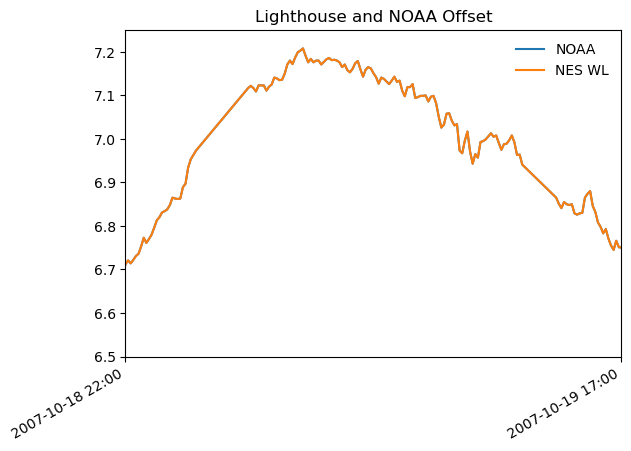

In [25]:
#plt.plot(total_df['Dates'],total_df['Lighthouse WL'], label = 'OG Lighthouse')

plt.plot(total_df['Dates'],total_df['Shifted NOAA'], label = 'NOAA')

plt.plot(total_df['Dates'],total_df['NES WL'], label = 'NES WL')

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d %H:%M'))

plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=10))

plt.gcf().autofmt_xdate()

plt.ylim(6.5,7.25)

start_date = pd.to_datetime('2007-10-18 22:00')

end_date = pd.to_datetime('2007-10-19 17:00')

plt.xlim(start_date, end_date)
plt.legend(frameon = False)
plt.title('Lighthouse and NOAA Offset')